#**Upload the datasets**

In [1]:
from google.colab import files

uploaded = files.upload()

Saving StatewiseTestingDetails.csv to StatewiseTestingDetails.csv
Saving population_india_census2011.csv to population_india_census2011.csv


#**Import Libraries**

In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import os
import random

import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Change the number of rows/columns to be displayed

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#**Read the dataset**

**StatewiseTestingDetails.csv** - Total positive & negative cases in a day in each state.  \


**population_india_census2011.csv** - Population at state level.




In [4]:
StatewiseTestingDetails=pd.read_csv('StatewiseTestingDetails.csv')
population_india_census2011=pd.read_csv('population_india_census2011.csv')

In [5]:
print(StatewiseTestingDetails.head())

         Date                        State  TotalSamples Negative  Positive
0  2020-04-17  Andaman and Nicobar Islands        1403.0     1210      12.0
1  2020-04-24  Andaman and Nicobar Islands        2679.0      NaN      27.0
2  2020-04-27  Andaman and Nicobar Islands        2848.0      NaN      33.0
3  2020-05-01  Andaman and Nicobar Islands        3754.0      NaN      33.0
4  2020-05-16  Andaman and Nicobar Islands        6677.0      NaN      33.0


In [6]:
print(population_india_census2011.head())

   Sno           State  Population  Rural population  Urban population                         Area                  Density  Gender Ratio
0    1   Uttar Pradesh   199812341         155317278          44495063   240,928 km2 (93,023 sq mi)    828/km2 (2,140/sq mi)           912
1    2     Maharashtra   112374333          61556074          50818259  307,713 km2 (118,809 sq mi)      365/km2 (950/sq mi)           929
2    3           Bihar   104099452          92341436          11758016    94,163 km2 (36,357 sq mi)  1,102/km2 (2,850/sq mi)           918
3    4     West Bengal    91276115          62183113          29093002    88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)           953
4    5  Madhya Pradesh    72626809          52557404          20069405  308,245 km2 (119,014 sq mi)      236/km2 (610/sq mi)           931


#**Check for missing values**

In [7]:
StatewiseTestingDetails.isnull().sum() 

Date               0
State              0
TotalSamples       0
Negative        3772
Positive        3200
dtype: int64

In [8]:
population_india_census2011.isnull().sum()

Sno                 0
State               0
Population          0
Rural population    0
Urban population    0
Area                0
Density             0
Gender Ratio        0
dtype: int64

#**Impute Missing values**

**Impute Missing values:** There are some missing values in ‘Positive’ and ‘negative’ column. We will impute these missing values by the median with respect to each state.

In [9]:
StatewiseTestingDetails.dtypes

Date             object
State            object
TotalSamples    float64
Negative         object
Positive        float64
dtype: object

In [10]:
StatewiseTestingDetails['Negative']=pd.to_numeric(StatewiseTestingDetails['Negative'], errors='coerce').astype('Int64')

In [11]:
StatewiseTestingDetails['Negative']=StatewiseTestingDetails['Negative'].fillna(99999999).astype(np.int64, errors='raise')
StatewiseTestingDetails['Negative']=StatewiseTestingDetails['Negative'].replace(99999999, np.nan)

In [12]:
StatewiseTestingDetails['Positive']=StatewiseTestingDetails['Positive'].fillna(99999999).astype(np.int64, errors='raise')
StatewiseTestingDetails['Positive']=StatewiseTestingDetails['Positive'].replace(99999999, np.nan)

In [13]:
StateMedianPositive=StatewiseTestingDetails.groupby('State')[['Positive']].median().reset_index().rename(columns={'Positive':'Median(positive)'})
StateMedianPositive.head()

,State,Median(positive)
0,Andaman and Nicobar Islands,2945.0
1,Andhra Pradesh,4126.0
2,Arunachal Pradesh,101.0
3,Assam,6067.5
4,Bihar,5695.0


In [14]:
for index,row in StatewiseTestingDetails.iterrows():  #Iterate over DataFrame rows as (index, Series) pairs

    if pd.isnull(row['Positive']):

        StatewiseTestingDetails['Positive'][index]=int(StateMedianPositive['Median(positive)'][StateMedianPositive['State']==row['State']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
StateMedianNegative=StatewiseTestingDetails.groupby('State')[['Negative']].median().reset_index().rename(columns={'Negative':'Median(negative)'})
StateMedianNegative.head()

,State,Median(negative)
0,Andaman and Nicobar Islands,1210.0
1,Andhra Pradesh,1759520.0
2,Arunachal Pradesh,111280.5
3,Assam,21194.5
4,Bihar,2299.0


In [16]:
for index,row in StatewiseTestingDetails.iterrows():  #Iterate over DataFrame rows as (index, Series) pairs

    if pd.isnull(row['Negative']):

        StatewiseTestingDetails['Negative'][index]=(StateMedianNegative['Median(negative)'][StateMedianNegative['State']==row['State']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
StatewiseTestingDetails.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,1210.0,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,1210.0,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,1210.0,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,1210.0,33.0


In [18]:
#Merge StatewiseTestingDetails & population_india_census2011 dataframes
data=pd.merge(StatewiseTestingDetails,population_india_census2011,on='State')

In [19]:
data.head(2)

,Date,State,TotalSamples,Negative,Positive,Sno,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
1,2020-04-24,Andaman and Nicobar Islands,2679.0,1210.0,27.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876


In [20]:
def densityCheck(data):
    data['density_Group']=0
    for index,row in data.iterrows():
        status=None
        i=row['Density'].split('/')[0]
        try:
            if (',' in i):
                i=int(i.split(',')[0]+i.split(',')[1])
            elif ('.' in i):
                i=round(float(i))
            else:
                i=int(i)
        except ValueError as err:
            pass
        try:
            if (0<i<=300):
                status='Dense1'
            elif (300<i<=600):
                status='Dense2'
            elif (600<i<=900):
                status='Dense3'
            else:
                status='Dense4'
        except ValueError as err:
            pass
        data['density_Group'].iloc[index]=status
    return data

In [21]:
data=densityCheck(data)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [22]:
data.describe()

,TotalSamples,Negative,Positive,Sno,Population,Rural population,Urban population,Gender Ratio
count,7.888000e+03,7.711000e+03,7.888000e+03,7888.000000,7.888000e+03,7.888000e+03,7.888000e+03,7888.000000
mean,1.485453e+06,4.259070e+05,3.065500e+04,17.592926,3.639562e+07,2.512531e+07,1.127031e+07,938.424569
std,2.721745e+06,1.010983e+06,1.235879e+05,10.083183,4.379095e+07,3.278664e+07,1.332471e+07,62.772230
min,5.800000e+01,0.000000e+00,0.000000e+00,1.000000,2.740000e+05,2.899100e+04,1.434880e+05,711.000000
25%,4.502575e+04,5.620500e+03,4.415000e+02,9.000000,1.978502e+06,1.066358e+06,7.765150e+05,912.000000
50%,2.510130e+05,4.796400e+04,3.162000e+03,18.000000,2.535146e+07,1.650936e+07,5.937237e+06,948.000000
75%,1.685968e+06,3.210210e+05,1.131625e+04,26.000000,6.043969e+07,3.497056e+07,1.636890e+07,976.000000
max,2.062145e+07,9.581330e+06,1.638961e+06,35.000000,1.998123e+08,1.553173e+08,5.081826e+07,1084.000000


In [23]:
df=pd.DataFrame({'Dense1':data[data['density_Group']=='Dense1']['Positive'],
                 'Dense2':data[data['density_Group']=='Dense2']['Positive'],
                 'Dense3':data[data['density_Group']=='Dense3']['Positive'],
                 'Dense4':data[data['density_Group']=='Dense4']['Positive']})

In [24]:
df.describe()

,Dense1,Dense2,Dense3,Dense4
count,3367.000000,2.643000e+03,497.000000,1381.000000
mean,3946.507277,6.301413e+04,81292.106640,15619.280956
std,8581.052875,1.946951e+05,157728.981919,26568.336104
min,0.000000,2.000000e+00,265.000000,0.000000
25%,101.000000,2.439000e+03,3902.000000,358.000000
50%,945.000000,6.067000e+03,10103.000000,5104.000000
75%,4109.000000,3.468600e+04,56355.000000,20834.000000
max,97920.000000,1.638961e+06,644698.000000,151928.000000


In [25]:
np.random.seed(1234)
dataNew=pd.DataFrame({'Dense1':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10),
'Dense2':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10),
'Dense3':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10),
'Dense4':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10)})

In [26]:
dataNew.head()

,Dense1,Dense2,Dense3,Dense4
0,610.0,12.0,1905.0,10827.0
1,12068.0,112.0,945.0,2079.0
2,48.0,548.0,4109.0,70.0
3,3081.0,62.0,27.0,4730.0
4,83.0,1450.0,101.0,489.0


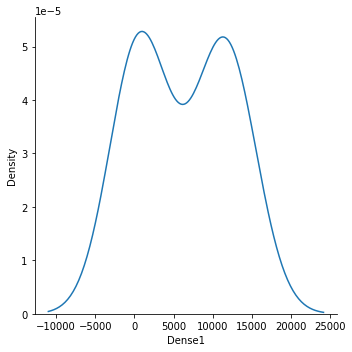

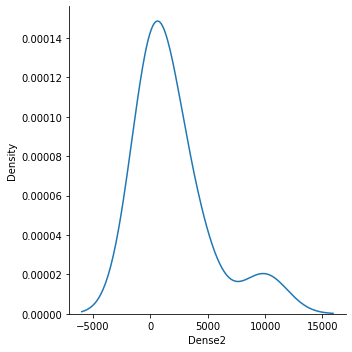

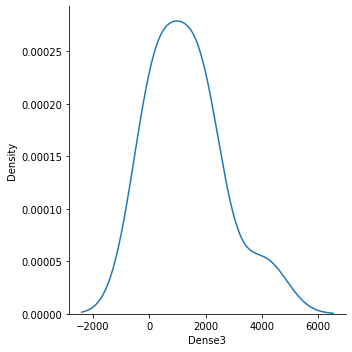

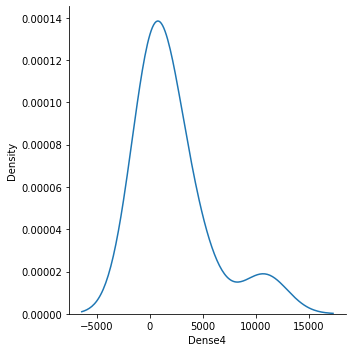

In [27]:
sns.displot(dataNew['Dense1'], kind="kde")
sns.displot(dataNew['Dense2'], kind="kde")
sns.displot(dataNew['Dense3'], kind="kde")
sns.displot(dataNew['Dense4'], kind="kde")

In [28]:
dataNew['Dense1'],fitted_lambda = stats.boxcox(dataNew['Dense1'])
dataNew['Dense2'],fitted_lambda = stats.boxcox(dataNew['Dense2'])
dataNew['Dense3'],fitted_lambda = stats.boxcox(dataNew['Dense3'])
dataNew['Dense4'],fitted_lambda = stats.boxcox(dataNew['Dense4'])

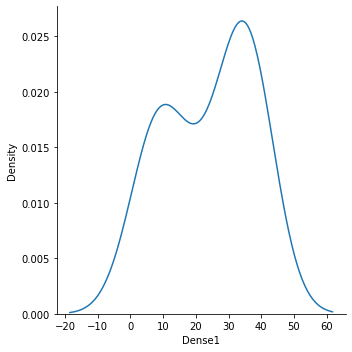

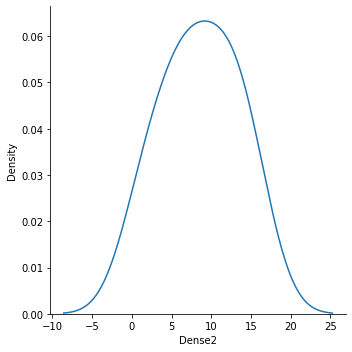

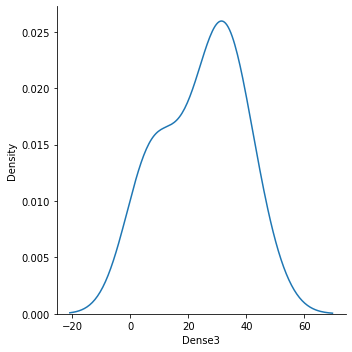

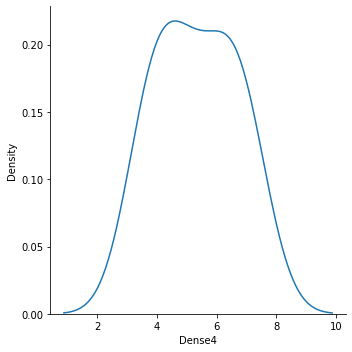

In [29]:
sns.displot(dataNew['Dense1'], kind="kde")
sns.displot(dataNew['Dense2'], kind="kde")
sns.displot(dataNew['Dense3'], kind="kde")
sns.displot(dataNew['Dense4'], kind="kde")

#**One-Way ANOVA Test**

**One way analysis of variance:** 

One-Way ANOVA compares the means of two or more independent groups, in order to determine whether there is statistical evidence that the associated population means are significantly different.

**Assumptions:**

>The observations are obtained independently and randomly from the population.

>The dependent variable is normally distributed in each group that is being compared in the one-way ANOVA.

>Independence of cases: the sample cases should be independent of each other.

>Homogeneity of variance: Homogeneity means that the variance among the groups should be approximately equal

**Null and alternate hypothesis:**



> Null Hypothesis – There is no significant difference among the groups (H0: µ1 = µ2 = µ3  = ...   = µk) \


> Alternate Hypothesis – There is a significant difference among the groups (at least one of the mean is different)





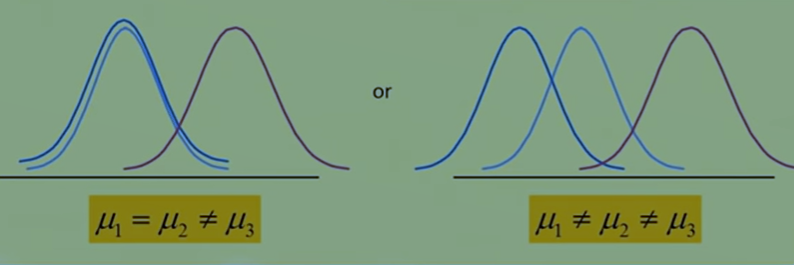

ANOVA is performed by comparing two types of variation, the variation between the sample means, as well as the variation within each of the samples. The below-mentioned formula represents one-way Anova test statistics.

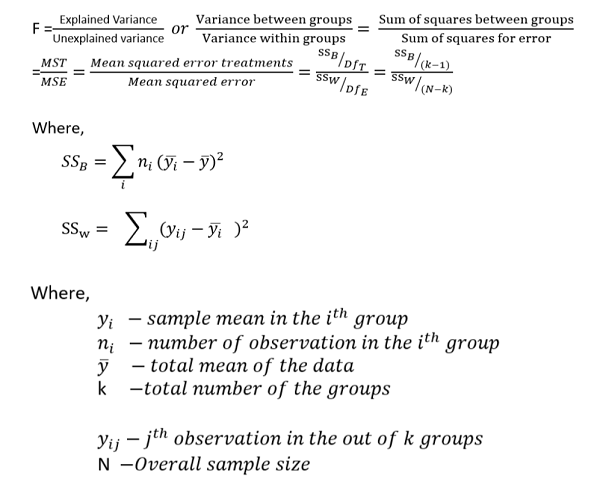

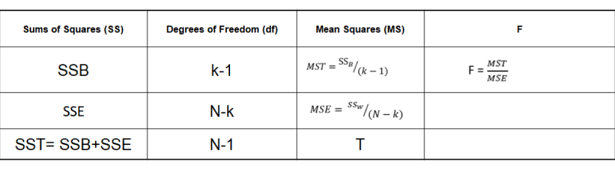

**Average of each group:**

In [30]:
import numpy as np
m1=np.mean(dataNew['Dense1'])
m2=np.mean(dataNew['Dense2'])
m3=np.mean(dataNew['Dense3'])
m4=np.mean(dataNew['Dense4'])

print('Average of Dense1: {}'.format(m1))
print('Average of Dense2: {}'.format(m2))
print('Average of Dense3: {}'.format(m3))
print('Average of Dense4: {}'.format(m4))

Average of Dense1: 24.042233511049677
Average of Dense2: 8.597720209290568
Average of Dense3: 24.47183396851687
Average of Dense4: 5.323462064102827


**Overall mean:**

In [31]:
m=(m1+m2+m3+m4)/4
print('Overall mean: {}'.format(m))

Overall mean: 15.608812438239985


**‘between-group’ sum of squared differences:** 

In [32]:
SSb=10*((m1-m)**2+(m2-m)**2+(m3-m)**2+(m4-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 3046.1958819906044


**we can compute the MSb as:**

In [33]:
MSb=SSb/3
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 1015.3986273302015


**Calculate the “within-group” sum of squares:**

In [34]:
err_a=list(dataNew['Dense1']-m1)
err_b=list(dataNew['Dense2']-m2)
err_c=list(dataNew['Dense3']-m3)
err_d=list(dataNew['Dense4']-m4)

err=err_a+err_b+err_c+err_d
ssw=[]
for i in err:
    ssw.append(i**2)
    
SSw=np.sum(ssw)

print('Within-group Sum of Squared Differences: {}'.format(SSw))

Within-group Sum of Squared Differences: 3434.524936080502


In [35]:
MSw=SSw/36
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 95.40347044668061


In [36]:
F=MSb/MSw
print('F-score: {}'.format(F))

F-score: 10.643204304582301


If the p-value associated with the F is smaller than 0.05, then the null hypothesis is rejected and the alternative hypothesis is supported. If the null hypothesis is rejected, we can conclude that the means of all the groups are not equal.

In [37]:
import scipy.stats as stats
stats.f_oneway(dataNew['Dense1'],dataNew['Dense2'],dataNew['Dense3'],dataNew['Dense4'])

F_onewayResult(statistic=10.643204304582307, pvalue=3.7479470130903396e-05)